In [1]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
# Create a file path and read in the data for 2013.
export_2013_df = pd.read_csv("AnnualExports/Total Export Value All Commodities 2013.csv")
export_2013_df.head()

,EXPALL2013,COUNTRY,SCHEDULE
0,1410116220,Afghanistan,5310
1,74364825,Albania,4810
2,1848703921,Algeria,7210
3,5796907,Andorra,4271
4,1443395524,Angola,7620


In [3]:
# Create a file path and read in the data for 2014.
export_2014_df = pd.read_csv("AnnualExports/Total Export Value All Commodities 2014.csv")
export_2014_df.head()

,EXPALL2014,COUNTRY,SCHEDULE
0,812720949,Afghanistan,5310
1,51256821,Albania,4810
2,2616922429,Algeria,7210
3,3789433,Andorra,4271
4,2039267110,Angola,7620


In [4]:
# Create a file path and read in the data for 2015.
export_2015_df = pd.read_csv("AnnualExports/Total Export Value All Commodities 2015.csv")
export_2015_df.head()

,EXPALL2015,COUNTRY,SCHEDULE
0,478711524,Afghanistan,5310
1,30897665,Albania,4810
2,1875732769,Algeria,7210
3,3336817,Andorra,4271
4,1166094807,Angola,7620


In [5]:
# Create a file path and read in the data for 2016.
export_2016_df = pd.read_csv("AnnualExports/Total Export Value All Commodities 2016.csv")
export_2016_df.head()

,EXPALL2016,COUNTRY,SCHEDULE
0,912724175,Afghanistan,5310
1,50293415,Albania,4810
2,2191261625,Algeria,7210
3,2830268,Andorra,4271
4,1249758184,Angola,7620


In [6]:
# Create a file path and read in the data for 2017.
export_2017_df = pd.read_csv("AnnualExports/Total Export Value All Commodities 2017.csv")
export_2017_df.head()

,EXPALL2017,COUNTRY,SCHEDULE
0,941428060,Afghanistan,5310
1,62086804,Albania,4810
2,1059840617,Algeria,7210
3,3285167,Andorra,4271
4,809444868,Angola,7620


In [7]:
# Create a file path and read in the data for 2018.
export_2018_df = pd.read_csv("AnnualExports/Total Export Value All Commodities 2018.csv")
export_2018_df.head()

,EXPALL2018,COUNTRY,SCHEDULE
0,1233900863,Afghanistan,5310
1,59247055,Albania,4810
2,1250222221,Algeria,7210
3,3065762,Andorra,4271
4,526550201,Angola,7620


In [10]:
#merge the dataframes on the country column and schedule column
allyears_exports_df = export_2013_df.merge(export_2014_df, on=['COUNTRY','SCHEDULE'], how='outer')
allyears_exports_df = allyears_exports_df.merge(export_2015_df, on=['COUNTRY','SCHEDULE'], how='outer')
allyears_exports_df = allyears_exports_df.merge(export_2016_df, on=['COUNTRY','SCHEDULE'], how='outer')
allyears_exports_df = allyears_exports_df.merge(export_2017_df, on=['COUNTRY','SCHEDULE'], how='outer')
allyears_exports_df = allyears_exports_df.merge(export_2018_df, on=['COUNTRY','SCHEDULE'], how='outer')

#remove schedule column
allyears_exports_df.drop('SCHEDULE', axis=1, inplace=True)

#reorder columns to have country first
allyears_exports_df = allyears_exports_df.reindex(columns=['COUNTRY', 'EXPALL2013', 'EXPALL2014', 'EXPALL2015', 'EXPALL2016', 'EXPALL2017', 'EXPALL2018'])

#set the country as the index
allyears_exports_df.set_index('COUNTRY', inplace=True)

#create a new column with the total exports for each country from 2013-2018
allyears_exports_df['Sum'] = allyears_exports_df.sum(axis=1)

#sort by the total amount exported from 2013-2108 with the largest total first.
allyears_exports_df = allyears_exports_df.sort_values(by='Sum', ascending=False)

#get the sum of the sum column
total_exports = allyears_exports_df['Sum'].sum()

#create a column with the % of total imports for each country
allyears_exports_df['% of Total Exports'] = ((allyears_exports_df['Sum']/ total_exports)*100).round(2)

allyears_exports_df

,EXPALL2013,EXPALL2014,EXPALL2015,EXPALL2016,EXPALL2017,EXPALL2018,Sum,% of Total Exports
COUNTRY,,,,,,,,
Canada,300754868974,312816950458,280855169199,266734465220,282265135262,298719019857,1742145608970,18.60
Mexico,225954367783,241007162317,236460137152,230051175309,243314438647,265010357329,1441797638537,15.40
China,121746188637,123657203406,115873365314,115545507660,129893586716,120341425641,727057277374,7.76
Japan,65237414094,66891842650,62387809646,63226075952,67605076964,74966716044,400314935350,4.27
United Kingdom,47361236230,53913170241,56094705824,55169322571,56257922547,66228171593,335024529006,3.58
...,...,...,...,...,...,...,...,...
Western Sahara,156076,276987,32113,93983,418356,259989,1237504,0.00
St Pierre and Miquelon,261629,4364,227459,62460,390569,132128,1078609,0.00
Pitcairn Islands,0,55591,17405,51658,1431,84549,210634,0.00


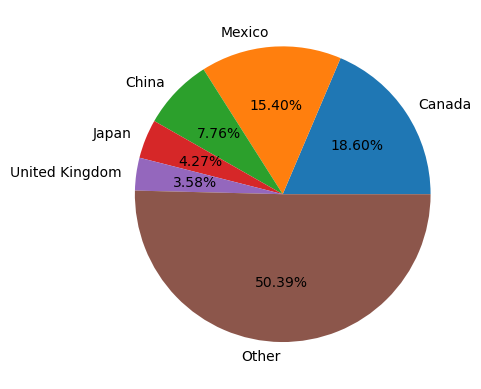

In [30]:
# Create the pie chart
# Labels for the sections of our pie chart
labels = ["Canada", "Mexico", "China", "Japan", "United Kingdom", "Other"]
other = 100 - allyears_exports_df.at['Canada', '% of Total Exports'] - allyears_exports_df.at['Mexico', '% of Total Exports'] - allyears_exports_df.at['China', '% of Total Exports'] - allyears_exports_df.at['Japan', '% of Total Exports'] - allyears_exports_df.at['United Kingdom', '% of Total Exports']

# The values of each section of the pie chart
sizes = [allyears_exports_df.at['Canada', '% of Total Exports'], allyears_exports_df.at['Mexico', '% of Total Exports'], allyears_exports_df.at['China', '% of Total Exports'], allyears_exports_df.at['Japan', '% of Total Exports'], allyears_exports_df.at['United Kingdom', '% of Total Exports'], other]

plt.pie(sizes, labels=labels, autopct="%1.2f%%")
plt.show()

# Tells matplotlib that we want a pie chart with equal axes
plt.show()